### The Python NaturalLanguageToolKit (NLTK) 

is a set of modules and corpora enabling the reader to do natural langauge processing against corpora of one or more texts. It goes beyond text minnig and provides tools to do machine learning, but this Notebook barely scratches that surface.

### Install NLTK & Download data

* pip install nltk -- install nltk in the correct virtual environment
* import nltk
* nltk.download() -- pops up a GUI

In [ ]:
!pip install nltk

In [2]:
import nltk

In [4]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [3]:
# nltk.download()
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [6]:
sents()

sent1: Call me Ishmael .
sent2: The family of Dashwood had long been settled in Sussex .
sent3: In the beginning God created the heaven and the earth .
sent4: Fellow - Citizens of the Senate and of the House of Representatives :
sent5: I have a problem with people PMing me to lol JOIN
sent6: SCENE 1 : [ wind ] [ clop clop clop ] KING ARTHUR : Whoa there !
sent7: Pierre Vinken , 61 years old , will join the board as a nonexecutive director Nov. 29 .
sent8: 25 SEXY MALE , seeks attrac older single lady , for discreet encounters .
sent9: THE suburb of Saffron Park lay on the sunset side of London , as red and ragged as a cloud of sunset .


### Outline

- Text similarity and concordance

- Plot word location (dispersion plot)

- Plot frequency distribtions

- NGrams

- Word Tokenize

- Sentence Tokenize

In [ ]:
The cat is green
N-Gram

Bi-Gram (N=2)
[(The, cat), (cat,is), (is,green)]

### Searching Text

#### Concordance
A concordance permits us to see words in context. For example, we saw that monstrous occurred in contexts such as the size and picture of a whale. What other words appear in a similar range of contexts? We can find out by appending the term similar to the name of the text in question, then inserting the relevant word in parentheses:

In [13]:
text3

<Text: The Book of Genesis>

In [ ]:
# help(text1.concordance)

In [14]:
#text1.concordance("monstrous")
text3.concordance("lived") # genesis

Displaying 25 of 25 matches:
ay when they were created . And Adam lived an hundred and thirty years , and be
ughters : And all the days that Adam lived were nine hundred and thirty yea and
nd thirty yea and he died . And Seth lived an hundred and five years , and bega
ve years , and begat Enos : And Seth lived after he begat Enos eight hundred an
welve years : and he died . And Enos lived ninety years , and begat Cainan : An
 years , and begat Cainan : And Enos lived after he begat Cainan eight hundred 
ive years : and he died . And Cainan lived seventy years and begat Mahalaleel :
rs and begat Mahalaleel : And Cainan lived after he begat Mahalaleel eight hund
years : and he died . And Mahalaleel lived sixty and five years , and begat Jar
s , and begat Jared : And Mahalaleel lived after he begat Jared eight hundred a
and five yea and he died . And Jared lived an hundred sixty and two years , and
o years , and he begat Eno And Jared lived after he begat Enoch eight hundred y
 and two ye

In [16]:
# help(text1.similar)
# text1.similar("monstrous")
text2.similar("monstrous")

very so exceedingly heartily a as good great extremely remarkably
sweet vast amazingly


The term common_contexts allows us to examine just the contexts that are shared by two or more words, such as monstrous and very. 

In [19]:
text2.common_contexts(["monstrous", "very"])

a_pretty am_glad a_lucky is_pretty be_glad


In [21]:
def compare_words(*words):
    print("Compare similar words")
    for word in words:
        print('word = ', word, ' in ', text1)
        text1.similar(word)
    for word in words:
        print('word = ', word, ' in ', text2)
        text2.similar(word)
    print("text2.common_contexts: ")
    text2.common_contexts(list(words))
compare_words("monstrous", "very")

Compare similar words
word =  monstrous  in  <Text: Moby Dick by Herman Melville 1851>
true contemptible christian abundant few part mean careful puzzled
mystifying passing curious loving wise doleful gamesome singular
delightfully perilous fearless
word =  very  in  <Text: Moby Dick by Herman Melville 1851>
a same so last first pretty the too other only as one great white
strange rather next entire now his
word =  monstrous  in  <Text: Sense and Sensibility by Jane Austen 1811>
very so exceedingly heartily a as good great extremely remarkably
sweet vast amazingly
word =  very  in  <Text: Sense and Sensibility by Jane Austen 1811>
so as too a not monstrous the was more most how last exceedingly her
it only first will perfectly cottage
text2.common_contexts: 
a_pretty am_glad a_lucky is_pretty be_glad


In [22]:
x = nltk.text.Text("hello world")

<Text: h e l l o   w o...>

It is one thing to automatically detect that a particular word occurs in a text, and to display some words that appear in the same context. However, we can also determine the location of a word in the text: how many words from the beginning it appears. This positional information can be displayed using a dispersion plot. Each stripe represents an instance of a word, and each row represents the entire text. In 1.2 we see some striking patterns of word usage over the last 220 years (in an artificial text constructed by joining the texts of the Inaugural Address Corpus end-to-end). You can produce this plot as shown below. You might like to try more words (e.g., liberty, constitution), and different texts. Can you predict the dispersion of a word before you view it? As before, take care to get the quotes, commas, brackets and parentheses exactly right.

In [23]:
import matplotlib.pyplot as plt

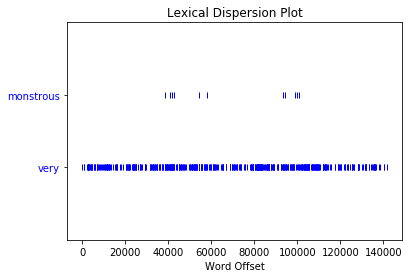

In [26]:
text2.dispersion_plot(["monstrous", "very"])

In [27]:
text4

<Text: Inaugural Address Corpus>

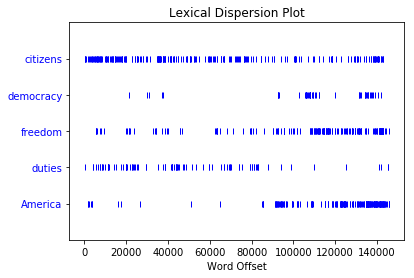

In [28]:
text4.dispersion_plot(["citizens", "democracy", "freedom", "duties", "America"])

### Counting Text

In [29]:
text3

<Text: The Book of Genesis>

In [32]:
# len(text3)
# sorted(set(text3))
text3.count("smote")
100 * text3.count('smote') / len(text3)

0.01116968992940756

In [37]:
def lexical_diversity(text):
    return 100*len(set(text)) / len(text)

def percentage(count, total):
    return 100 * count / total

In [38]:
lexical_diversity(text3)

6.2304530426235365

In [39]:
percentage(text3.count("God"), len(text3))

0.5160396747386292

### Fequency Distribution

In [42]:
fdist1 = FreqDist(text1)
print(fdist1)

<FreqDist with 19317 samples and 260819 outcomes>


In [43]:
fdist1.most_common(10)

[(',', 18713),
 ('the', 13721),
 ('.', 6862),
 ('of', 6536),
 ('and', 6024),
 ('a', 4569),
 ('to', 4542),
 (';', 4072),
 ('in', 3916),
 ('that', 2982)]

In [44]:
fdist1['whale']

906

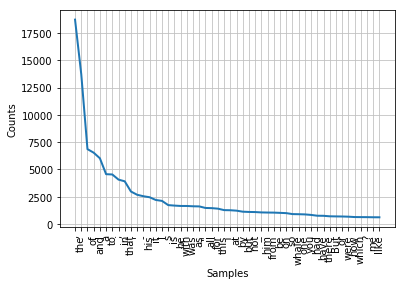

In [54]:
# fdist1.plot(50, cumulative=True)
fdist1.plot(50)

### Plot length of words

In [46]:
fdist = FreqDist(len(w) for w in text1)
fdist.most_common(10)

[(3, 50223),
 (1, 47933),
 (4, 42345),
 (2, 38513),
 (5, 26597),
 (6, 17111),
 (7, 14399),
 (8, 9966),
 (9, 6428),
 (10, 3528)]

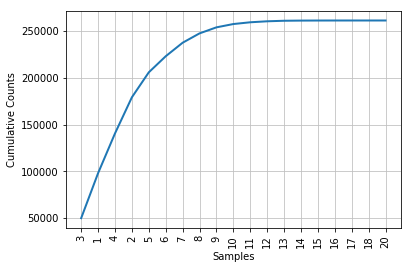

In [47]:
fdist.plot(50, cumulative=True)

### Fine-grained Selection of Words

In [49]:
text5

<Text: Chat Corpus>

In [50]:
fdist5 = FreqDist(text5)
sorted(w for w in set(text3) if len(w) > 7 and fdist5[w] > 7)

['anything', 'remember', 'together']

### Collocations and Bigrams

A collocation is a sequence of words that occur together unusually often. Thus red wine is a collocation, whereas the wine is not. A characteristic of collocations is that they are resistant to substitution with words that have similar senses; for example, maroon wine sounds definitely odd.



In [51]:
list(bigrams(['more', 'is', 'said', 'than', 'done']))

[('more', 'is'), ('is', 'said'), ('said', 'than'), ('than', 'done')]

In [53]:
text3.collocations()

said unto; pray thee; thou shalt; thou hast; thy seed; years old;
spake unto; thou art; LORD God; every living; God hath; begat sons;
seven years; shalt thou; little ones; living creature; creeping thing;
savoury meat; thirty years; every beast


### Resources for further learning
Main NLTK Python website:  https://www.nltk.org/

NLTK Book: http://www.nltk.org/book/